#### Name - Aakash Jain.
#### Roll No. - 222010019.
#### Subject - Data Mining Lab.
#### Assignment No. 5 - Apply Apriori Algorithm to a Bakery Dataset.
<hr />

Apply Apriori algorithm to a bakery dataset and Do the following:  
Add three columns as date(21, 3, 5...), month(1, 2, 12) and year.  
Provide visualizations for the following:  
    1. Number of units of sales of a particular product on a given day.  
    2. Number of products purchased by a customer.  
    3. Top 10 selling products.  
    4. Top 10 customers on a weekday.  
    5. Top 10 customers who visit in the morning.  
    6. Count of max number of items purchased.  
    7. Compare the monthly sales.  
    8. Find the number of unique customers.  
Drop the columns of weekday_weekend, Date_time, date, day, year,  
Create a transaction table in the format required for apriori algorithm  
Calculate support, confidence and lift for single item dataset  
Count no of k-itemset  
Consider all the frequent_itemsets for rule generation where 'lift'>=1  
which is the most frequently purchased product(X) and what are the other product purchased with X where 'lift'>=1  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import re

In [2]:
df = pd.read_csv('datasets/bakery.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Add three columns as date(21, 3, 5...), month(1, 2, 12) and year.  

In [4]:
df['date_time'] = df['date_time'].apply(lambda x: re.split(' |-+|/', x))

In [5]:
df['day'] = df['date_time'].apply(lambda x: int(x[0]))
df['month'] = df['date_time'].apply(lambda x: int(x[1]))
df['year'] = df['date_time'].apply(lambda x: int(x[2]))
df['time'] = df['date_time'].apply(lambda x: x[3])
df.drop(['date_time'], axis=1, inplace=True)
df.sample(10)

,Transaction,Item,period_day,weekday_weekend,day,month,year,time
9928,4977,Bread,afternoon,weekday,20,1,2017,12:14
14160,6848,Juice,morning,weekend,19,2,2017,11:38
19081,9036,Hot chocolate,morning,weekday,30,3,2017,08:56
8957,4512,Tiffin,morning,weekday,11,1,2017,10:43
15584,7448,Tea,afternoon,weekday,2,3,2017,16:25
16679,7931,Coffee,morning,weekend,11,3,2017,10:15
8706,4377,Bread,afternoon,weekend,8,1,2017,12:30
3945,1920,Bread,afternoon,weekday,23,11,2016,14:22
3144,1534,Bread,afternoon,weekday,17,11,2016,14:56
18886,8945,Tea,morning,weekday,28,3,2017,11:06


In [6]:
df.columns = ['customer_id', 'item', 'period', 'weektime', 'day', 'month', 'year', 'time']
df.sample(5)

,customer_id,item,period,weektime,day,month,year,time
4409,2170,Hot chocolate,morning,weekend,27,11,2016,10:51
13395,6539,Coffee,evening,weekday,13,2,2017,17:07
2128,1034,Coffee,morning,weekday,11,11,2016,10:09
16776,7968,Toast,afternoon,weekend,11,3,2017,14:13
12485,6152,Farm House,morning,weekday,7,2,2017,9:04


Provide visualizations for the following:  
    1. Number of units of sales of a particular product on a given day.  

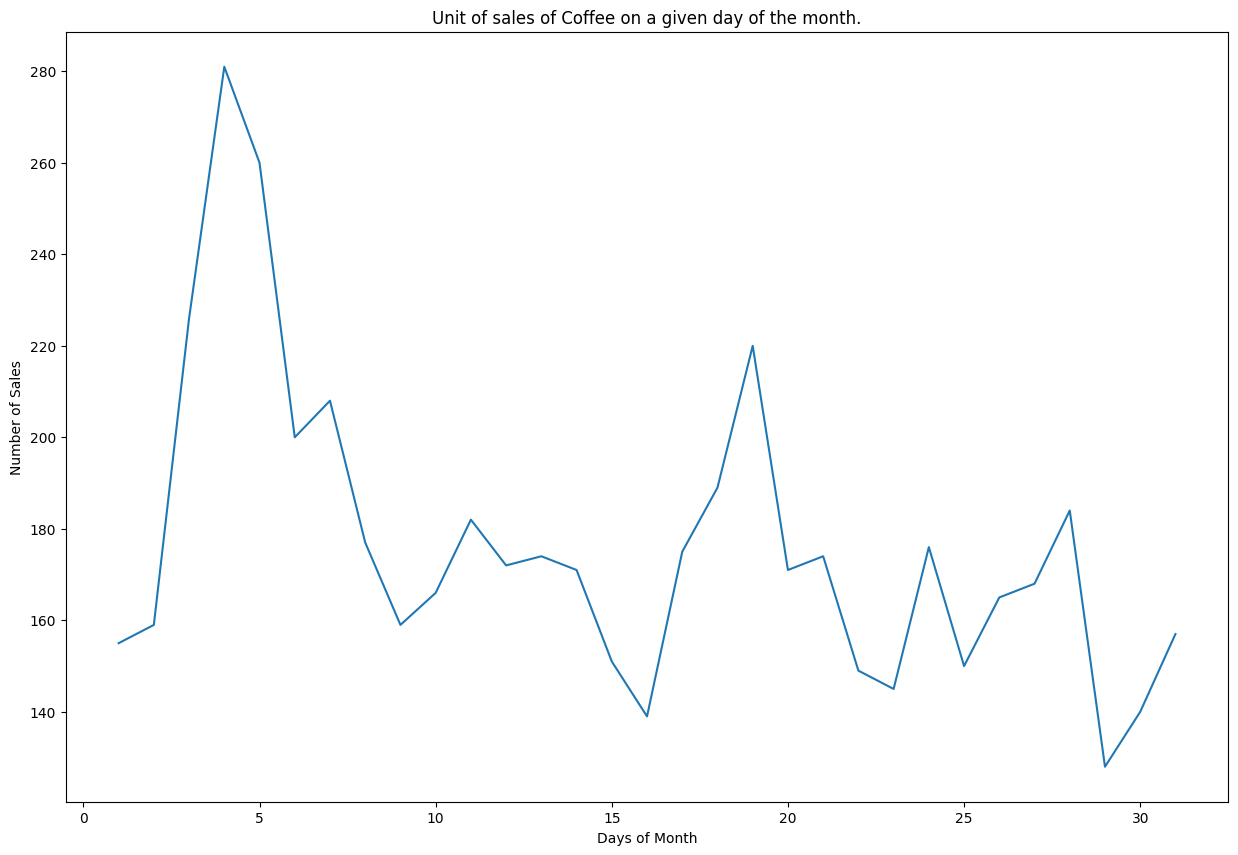

In [7]:
item = 'Coffee'
SalesOfProduct = df.loc[df["item"] == item]['day'].value_counts().sort_index()

plt.figure(figsize=(15, 10))
sns.lineplot(x = SalesOfProduct.index, y = SalesOfProduct.values)
plt.xlabel('Days of Month')
plt.ylabel('Number of Sales')
plt.title(f'Unit of sales of {item} on a given day of the month.')
plt.show()

    2. Number of products purchased by a customer.  

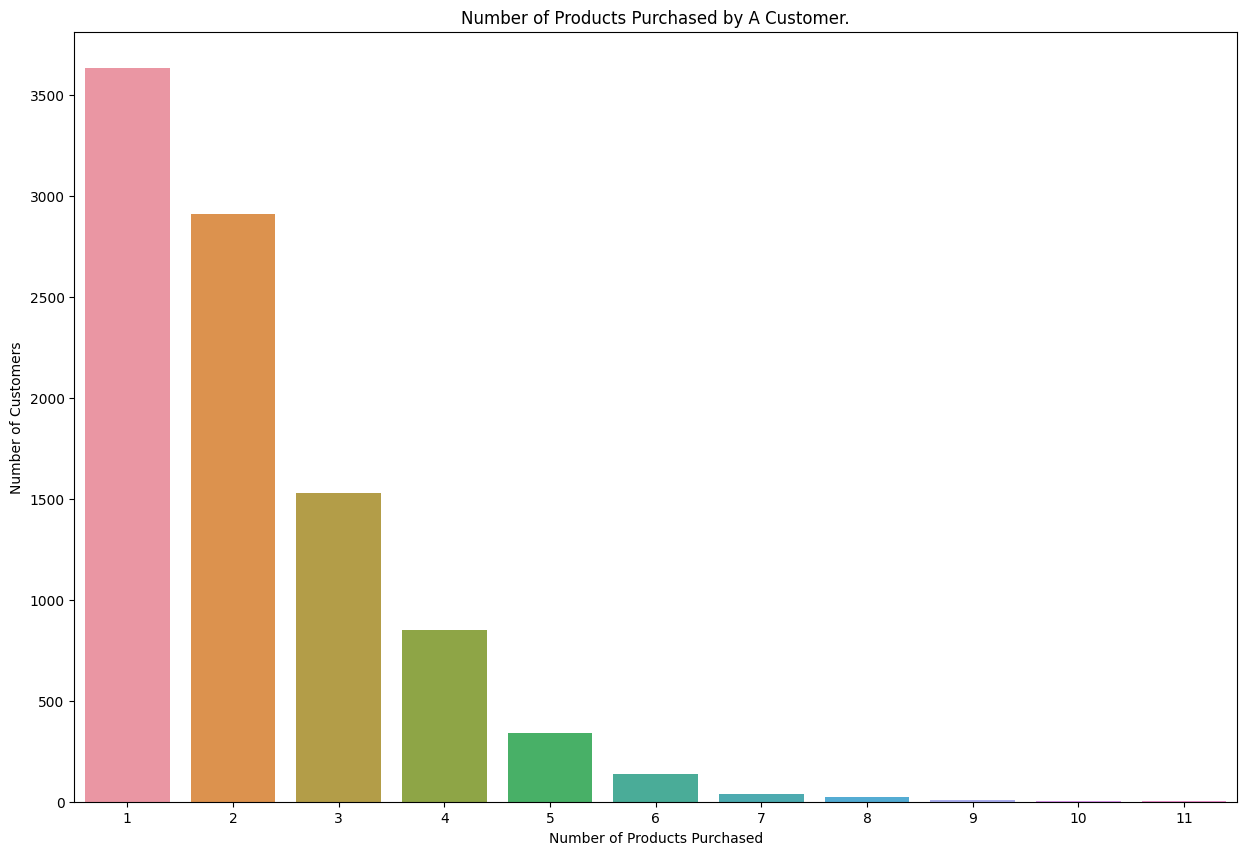

In [8]:
NumberOfProducts = df['customer_id'].value_counts().value_counts()

plt.figure(figsize=(15, 10))
sns.barplot(x = NumberOfProducts.index, y = NumberOfProducts.values)
plt.xlabel('Number of Products Purchased')
plt.ylabel('Number of Customers')
plt.title('Number of Products Purchased by A Customer.')
plt.show()

    3. Top 10 selling products.  

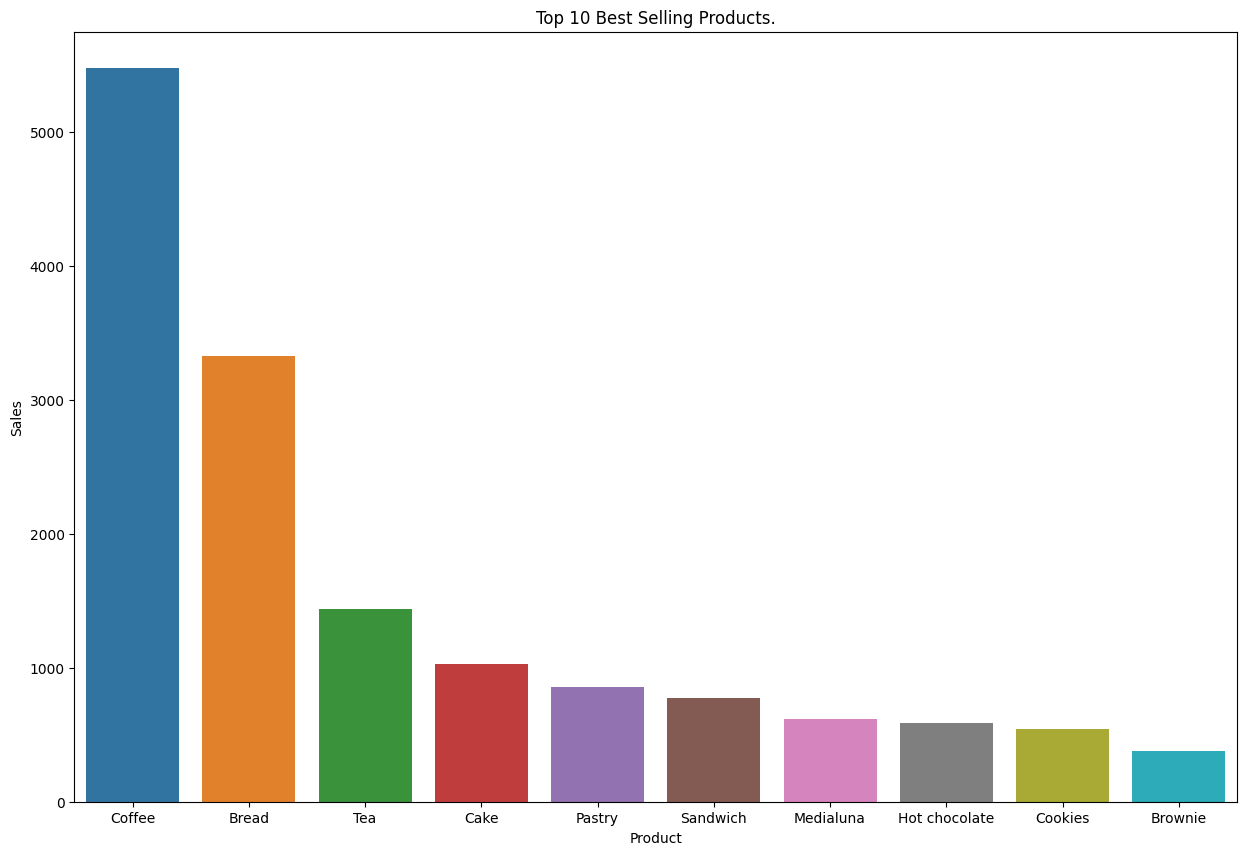

In [9]:
TopSelling = df['item'].value_counts()[:10]

plt.figure(figsize=(15, 10))
sns.barplot(x = TopSelling.index, y = TopSelling.values)
plt.xlabel("Product")
plt.ylabel("Sales")
plt.title('Top 10 Best Selling Products.')
plt.show()

    4. Top 10 customers on a weekday.  

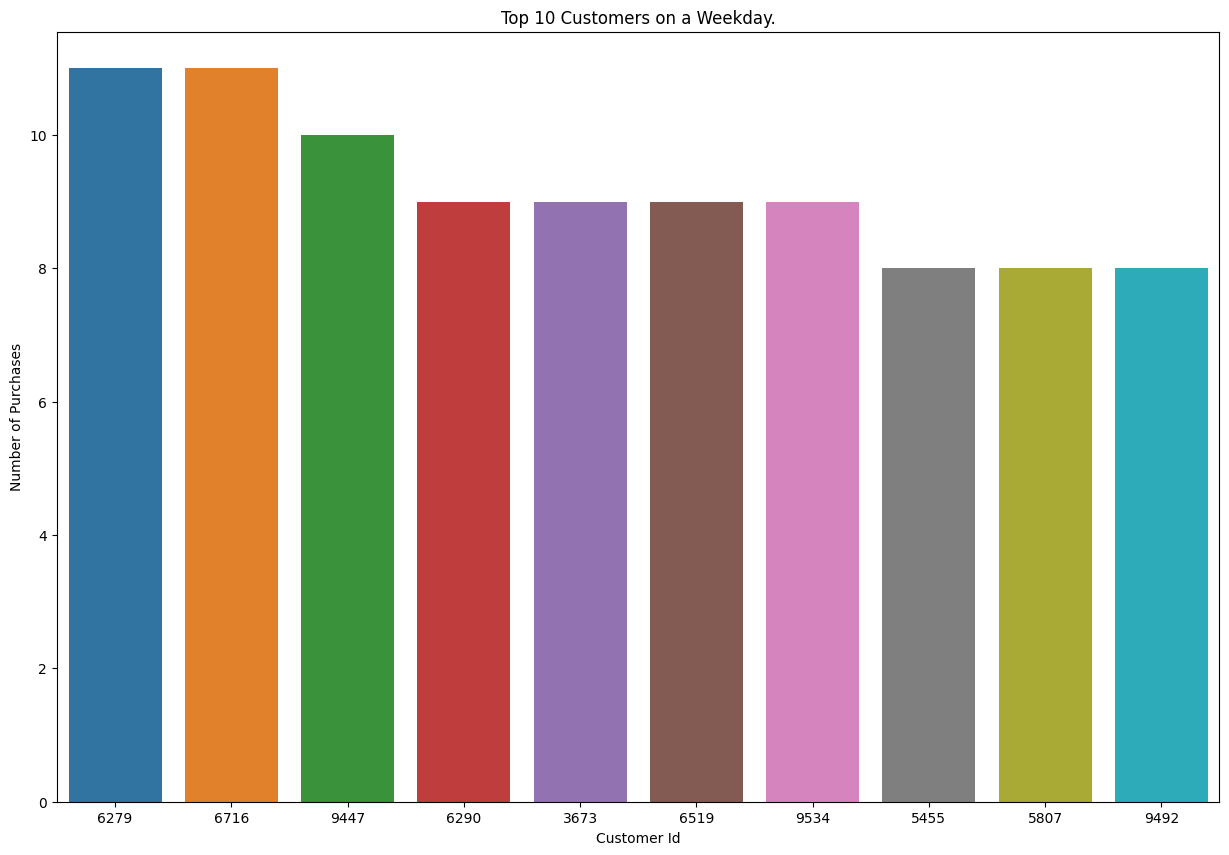

In [10]:
TopCustomers = df.loc[df['weektime'] == 'weekday']['customer_id'].value_counts()[:10]
plt.figure(figsize=(15, 10))
sns.barplot(x = TopCustomers.index, y = TopCustomers.values, order=TopCustomers.index)
plt.xlabel('Customer Id')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Customers on a Weekday.')
plt.show()

    5. Top 10 customers who visit in the morning.
    

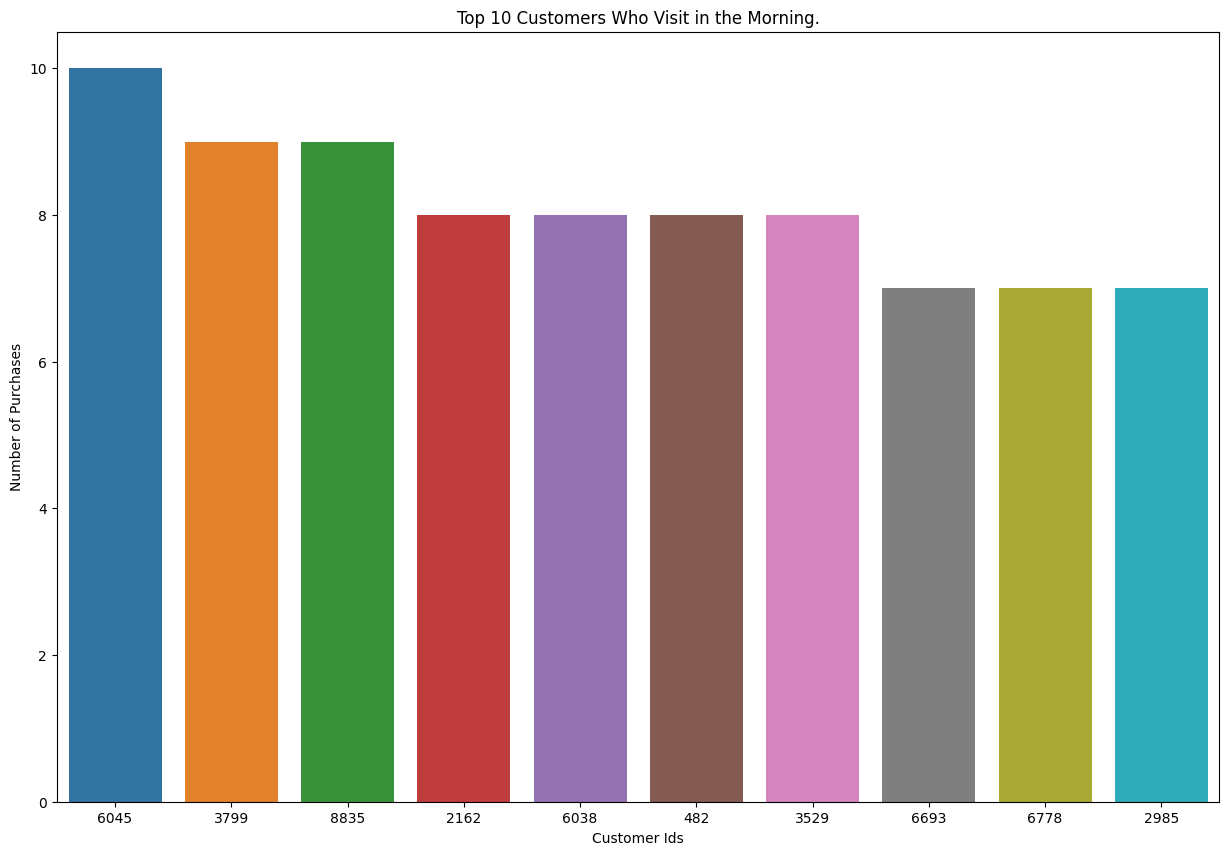

In [11]:
TopCustomerInMorning = df.loc[df['period'] == 'morning']['customer_id'].value_counts()[:10]

plt.figure(figsize=(15, 10))
sns.barplot(x = TopCustomerInMorning.index, y = TopCustomerInMorning.values, order=TopCustomerInMorning.index)
plt.xlabel("Customer Ids")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Customers Who Visit in the Morning.")
plt.show()

 6. Count of max number of items purchased. 

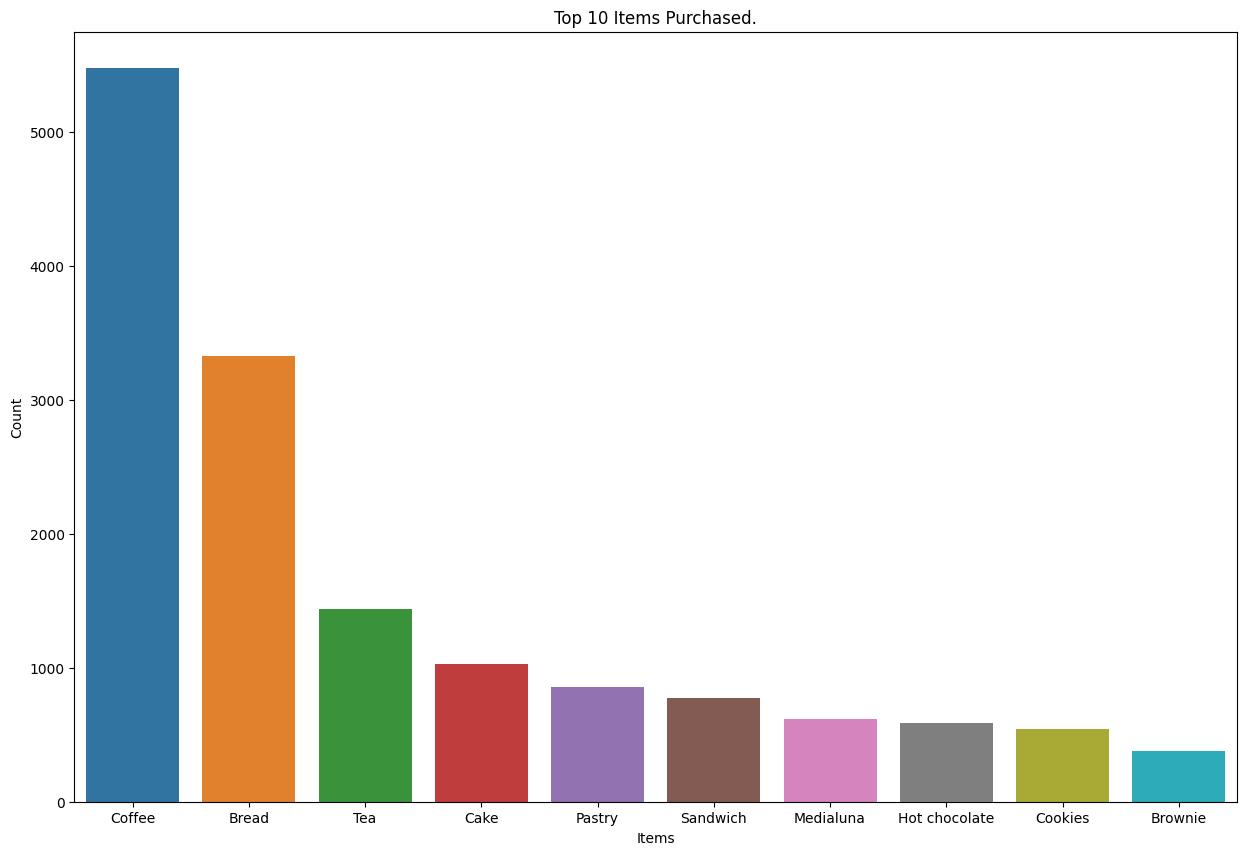

In [12]:
MaxNumberOfItems = df['item'].value_counts()[:10]

plt.figure(figsize=(15, 10))
sns.barplot(x = MaxNumberOfItems.index, y = MaxNumberOfItems.values)
plt.xlabel("Items")
plt.ylabel("Count")
plt.title("Top 10 Items Purchased.")
plt.show()

 
    7. Compare the monthly sales.  

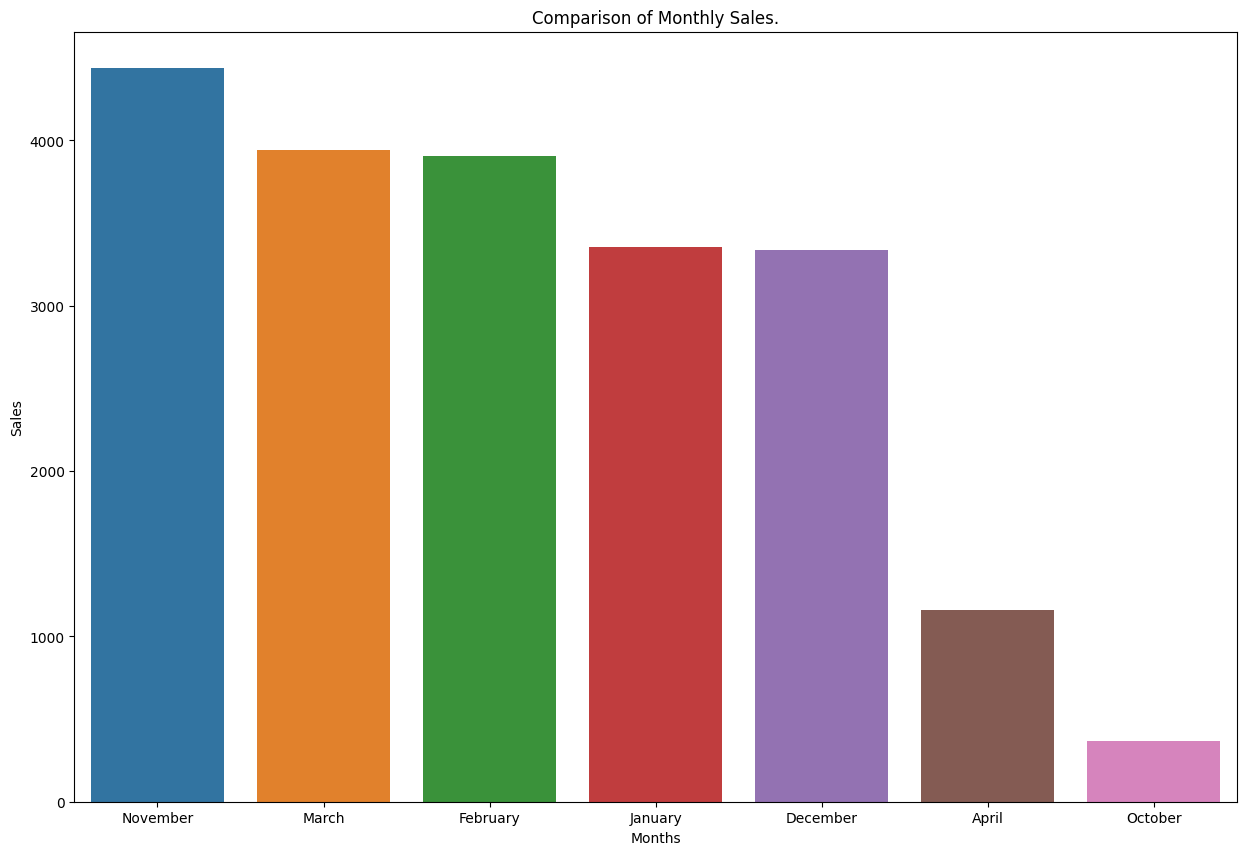

In [13]:
MonthlySales = df['month'].value_counts()
months = {1: "January", 2: "February", 3: "March", 4: "April", 10: "October", 11: "November", 12: "December"}

plt.figure(figsize=(15, 10))
sns.barplot(x = MonthlySales.index.map(months), y = MonthlySales.values)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Comparison of Monthly Sales.')
plt.show()

    8. Find the number of unique customers.  

Drop the columns of weekday_weekend, Date_time, date, day, year,  
Create a transaction table in the format required for apriori algorithm  
Calculate support, confidence and lift for single item dataset  
Count no of k-itemset  
Consider all the frequent_itemsets for rule generation where 'lift'>=1  
which is the most frequently purchased product(X) and what are the other product purchased with X where 'lift'>=1  

In [14]:
df.drop(['weektime', 'day', 'month', 'year'], axis=1, inplace=True)

In [15]:
transaction_table = df.groupby(['customer_id', 'item'])['item'].count().reset_index(name='count')
transaction_table

,customer_id,item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [16]:
transactions = df.groupby('customer_id')['item'].apply(list).tolist()
transactions[:10]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [17]:
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [18]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

     support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Toast, Coffee)
57  0.014369          (Tea, Sandwich)
58  0.010037    (Bread, Coffee, Cake)
59  0.011199  (Bread, Coffee, Pastry)
60  0.010037      (Coffee, Tea, Cake)

[61 rows x 2 columns]


In [19]:
single_itemset = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]
single_itemset = single_itemset['support'].apply(lambda x: x * len(transactions))
print(single_itemset)

0      344.0
1      152.0
2     3097.0
3      379.0
4      983.0
5      123.0
6     4528.0
7      184.0
8      515.0
9      371.0
10     142.0
11     100.0
12     552.0
13     142.0
14     125.0
15     365.0
16     585.0
17     134.0
18     364.0
19     815.0
20      99.0
21     680.0
22     275.0
23     327.0
24     326.0
25     172.0
26    1350.0
27     146.0
28     318.0
29     192.0
Name: support, dtype: float64


In [20]:
frequent_itemsets['itemsets'].apply(lambda x: len(x))

0     1
1     1
2     1
3     1
4     1
     ..
56    2
57    2
58    3
59    3
60    3
Name: itemsets, Length: 61, dtype: int64

In [21]:
(rules := association_rules(frequent_itemsets, metric='lift', min_threshold=1))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236


In [22]:
(most_frequent_product := frequent_itemsets.loc[frequent_itemsets['support'].idxmax(), 'itemsets'])

frozenset({'Coffee'})

In [23]:
rules[(rules['antecedents'] == most_frequent_product) & (rules['lift'] >= 1)]['consequents']

0          (Alfajores)
4            (Brownie)
6               (Cake)
12           (Cookies)
14     (Hot chocolate)
16             (Juice)
19         (Medialuna)
20            (Muffin)
22            (Pastry)
24          (Sandwich)
26             (Scone)
28    (Spanish Brunch)
31             (Toast)
Name: consequents, dtype: object